### Notebook to compare EP simulations between EP GUI, Simple PyEP API execution, and parallelized PyEP API execution

In [1]:
gui_dir = 'EPcomparison_gui'
parallel_dir = 'EPcomparison_pyparallel'
simple_dir = 'EPcomparison_pysimple'

#### Compare input files

In [5]:
! diff EPcomparison_gui/1992_historical_detroit_H.epw EPcomparison_pyparallel/1992_historical_detroit_H.epw
! diff EPcomparison_gui/1992_historical_detroit_H.epw EPcomparison_pysimple/1992_historical_detroit_H.epw

! diff EPcomparison_gui/in_DT92H.idf EPcomparison_pyparallel/in_DT92H.idf
! diff EPcomparison_gui/in_DT92H.idf EPcomparison_pysimple/in_DT92H.idf

#### Compare output files

In [7]:
! diff EPcomparison_pyparallel/eplusoutTimeSeriesData.csv EPcomparison_pysimple/eplusoutTimeSeriesData.csv
! diff EPcomparison_gui/eplusoutTimeSeriesData.csv EPcomparison_pysimple/eplusoutTimeSeriesData.csv

2,8761c2,8761
< 2023-01-01 00:00:00,16.206049280741905,20.0,23.00000002531604,20.17930251887,2.2591135601449177,21.034615905820623,69117.51857086134,0.0,172307.65550116322,38241.750072962146,4754.284698725945,1662908.3136937195,650056.5674801612,0.0,0.0,27025989.72736814,0.0,2597386.090017594,-0.9837318407531359,2597386.0900175935,27110330.078939144
< 2023-01-01 01:00:00,15.705741555726307,20.0,23.00000002531604,20.16894992712785,1.3009121553918341,21.046002123063502,76426.83384363097,0.0,103384.59330069821,22945.05004377735,2852.5708192355755,1546709.7899876577,718801.344420838,0.0,0.0,29884041.977514267,0.0,2471120.1824158374,-12.276077105225221,2471120.1824158374,29968382.329085268
< 2023-01-01 02:00:00,15.330108091151837,20.0,23.00000002531604,20.16432373564089,0.8296430082160123,20.983804695575223,77840.38910122948,0.0,68923.06220046543,15296.700029184893,1901.7138794903824,1539305.525620187,732095.9605716759,0.0,0.0,30436763.352078047,0.0,2435363.3514022334,-10.226056001238826,24

#### Compare timeseries values

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt

In [12]:
pysimple_df = pd.read_csv(simple_dir + '/eplusoutTimeSeriesData.csv')
gui_df = pd.read_csv(gui_dir + '/eplusoutTimeSeriesData.csv')

In [31]:
comp_1 = pd.concat([pysimple_df.iloc[100:105, 7:8], gui_df.iloc[100:105, 7:8]], axis=1)
comp_1

UNIT 1:ELECTRICITYHEATING [J]  UNIT 1:ELECTRICITYHEATING [J]
100                   86512.487816                   86512.487817
101                   84027.988688                   84027.988688
102                   79896.366383                   79896.366383
103                   71526.771085                   71526.771085
104                   77180.604182                   77180.604183

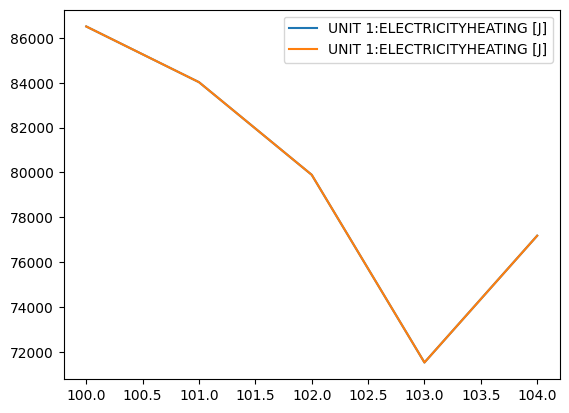

In [32]:
comp_1.plot()
plt.show()

In [33]:
comp_2 = pd.concat([pysimple_df.iloc[2000:2100, 7:8], gui_df.iloc[2000:2100, 7:8]], axis=1)
comp_2

UNIT 1:ELECTRICITYHEATING [J]  UNIT 1:ELECTRICITYHEATING [J]
2000                   44821.650997                   44821.650998
2001                   23068.159411                   23068.159411
2002                   12783.654214                   12783.654214
2003                   17113.582473                   17113.582474
2004                   15639.631400                   15639.631400
...                             ...                            ...
2095                   47898.936350                   47898.936350
2096                   33402.851912                   33402.851912
2097                   16745.413571                   16745.413571
2098                   10399.494464                   10399.494464
2099                    3258.954760                    3258.954759

[100 rows x 2 columns]

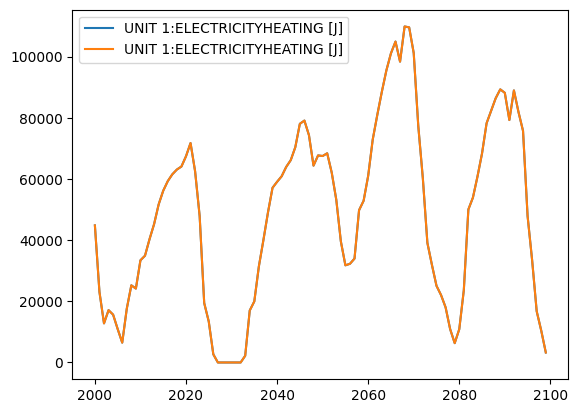

In [34]:
comp_2.plot()
plt.show()